## Gradient Descent

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) is a simple optimization technique which forms the building block in training neural networks. But this is not new for us, we all have used this in our daily life in one way or the other. I'll give one example. Remember the days when we
used TV antennas. Whenever we see grainy images on our TV, we had to adjust antenna's alignment.
First, we change the antenna's position in different directions and find which direction gave better images. Then, we make further adjustments in the same direction until we get finer image.
This is exactly what gradient descent does but efficiently. We make some adjustments to variables in such a way to get maximum performance or to minimize the error in the system.

Suppose we want to minimize the function: (Imagine $x$ and $y$ as positions of antenna in 2D and f as the number of grainy pixels in the TV image)

\begin{equation}
f=\frac{x^2}{2y^2}
\end{equation}

And currently we are at $(10,2)$ and $f=12.5$, and we want to update $x$ and $y$ to get reduced value of $f$. In particular, we want to know the value of $x$ and $y$ where we get the minimum value for $f$. In order to find them, we slightly adjust $x$ and $y$ to $(10,4)$ which results in $f=3.125$. And when we adjust to $(10,1)$, we get $f=50$. So, we continue our search from $(10,4)$ because it gave the best results. However, this can become tedious over time and we need to do this efficiently instead of searching by random changes.

Thanks to calculus, we can do this very efficiently. We first have to calculate gradients or derivates $\nabla_x$ and $\nabla_y$ of $f$ with respect to $x$ and $y$ respectively. The gradients give the direction in which the function $f$ is going to increase. Hence, to minimize the value of $f$, we just have to subtract $\nabla_x$ and $\nabla_y$ from $x$ and $y$ but in a controlled way using the update rate $\eta$ as shown below.

\begin{equation}
x = x - \eta \nabla_x \\
y = y - \eta \nabla_y
\end{equation}

The gradients $\nabla_x$ and $\nabla_y$ are the partial derivates of $f$ w.r.t $x$ and $y$ respectively. For the function $f$ we considered above, it can be computed as:

\begin{align}
\nabla_x & = \frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (\frac{x^2}{2y^2})\\
& = (\frac{1}{2y^2})\frac{\partial}{\partial x} (x^2)\\
& = (\frac{1}{2y^2})(2x)\\
& = \frac{x}{y^2}
\end{align}

\begin{align}
\nabla_y & = \frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (\frac{x^2}{2y^2})\\
& = (\frac{x^2}{2})\frac{\partial}{\partial y} (\frac{1}{y^2})\\
& = (\frac{x^2}{2})(-2y^{-3})\\
& = \frac{-x^2}{y^3}
\end{align}

Remember, to get partial derivative of $f$ w.r.t $x$, we keep $y$ terms constant and differentiate just $x$ terms and vice versa. And to conclude, we perform these updates iteratively until we reach the minimum value of $f$. 


Now that we know the theory behind gradient descent, we test our understanding with a simple example using a python program. 

Let's first import the packages that we need for array arithmetics and plotting (matplotlib and seaborn)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

Define the functions for computing function values at $x$ and $y$ and partial derivatives of $f$ w.r.t to $x$ and $y$.
Be sure, to compare with the equations that we defined above.

In [2]:
def fun(x, y):
    return (x**2) / (2*y**2)

def fun_der_x(x,y):
    return (x/y**2)

def fun_der_y(x,y):
    return (-x**2/y**3)

We start the search from a random point ie. random values for $x$ and $y$

In [3]:
# Initial values - Start the solution search randomly
random = np.random.randint(-100,100,2)
x, y = random[0], random[1]
f = fun(x, y)

And we create a matplotlib figure for plotting the results

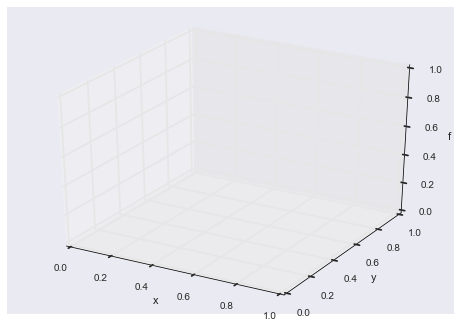

In [4]:
# Figure for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f")

We define the parameters for gradient descent such as update rate $\eta$ and number of iterations respectively

In [5]:
# Parameters
step_size = 0.07
n_iter = 1000

And finally, we perform gradient descent iteratively and at each iteration, we also display the values for $x$ and $y$ in a plot.

In [6]:
# Do gradient descent
for i in range(n_iter):
    der_x = fun_der_x(x,y)
    der_y = fun_der_y(x,y)
    x_prev, y_prev, f_prev = x,y,f
    x -= step_size * der_x
    y -= step_size * der_y
    f = fun(x, y)
    ax.scatter(x_prev, y_prev, f_prev, color="blue", s=2)

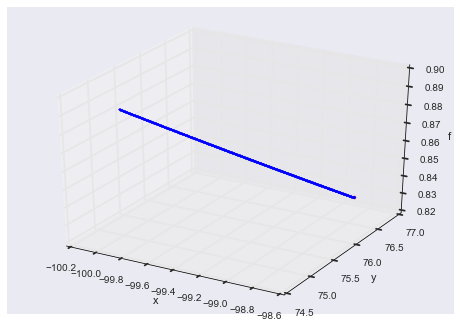

Minimum value of f :0.831891354829 found at (-98.7890875144,76.5879897768)


In [7]:
ax.scatter(x, y, f, color="red", s=10)
display(fig)
print("Minimum value of f :" + str(f) + " found at ("+str(x)+","+str(y)+")")

Voila! See how the solution has evolved from a random point to the point where we get minumum of f.